# Creating pre-clean dataset 

In [1]:
#importing all databases with Twitter data
from os import listdir
import pandas as pd 
path = r'./data' # use your path

filepaths = [f for f in listdir(".") if f.endswith('.csv')]
li = []

#reading all datasets
for filename in filepaths:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

database = pd.concat(li, axis=0, ignore_index=True)

In [2]:
database["company"].unique()

array(['US Bank', 'Truist', 'PNC Financial', 'Wells Fargo', 'Twitter',
       'HP', 'Dell', 'Uber', 'zappos', 'linkedin', 'github', 'appletv',
       'instagram', 'primevideo', 'awscloud', 'aws', 'amazonecho',
       'amazonalexa', 'imdb', 'twitch', 'wholefoods', "Macy's",
       'Nordstrom', "Kohl's", 'CVS', 'J & J ', 'P&G ',
       'Colgate-Palmolive', 'Walgreens', 'General Mills', 'Coca-Cola',
       'Ralph Lauren', 'Costco', 'TJX', 'Home Depot', 'Walmart', 'Target',
       'Lowes', 'Ross', 'Dollar tree', 'Dollar General', 'Apple',
       'Amazon', 'Facebook', 'Alphabet (class A,C)', 'macbook', 'macos',
       'airpods', 'applewatch', 'apple', 'microsoftoffice', 'windows10',
       'xbox', 'microsoftsurface', 'iphone', 'AmericanAirlines',
       'UnitedAirlines', 'AlaskaAir', 'SpiritAir', 'Microsoft', 'Google',
       'eBay', 'Lyft', 'Snap', 'JPMorgan', 'BankofAmerica', 'WellsFargo',
       'USBank', 'Monster Beverage', 'Tyson Foods', 'Hershey', 'Kellog',
       'Kroger', 'Kraft Hei

In [3]:
database.head(11)

,Unnamed: 0,got_criteria,company,tweet_text,date,hashtags,retweets,favorites,mentions
0,0,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0,0,NaN
1,1,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,"#US, #UK and #EUropen Countries #VBA (#VIRTUAL...",2017-01-01 08:28:13+00:00,#US #UK #EUropen #VBA #VIRTUAL #BANK #ACCOUNT ...,0,0,NaN
2,2,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#Marijuana-related businesses should get bette...,2017-01-02 13:22:33+00:00,#Marijuana #US,0,0,@SenWarren
3,3,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#US Senators propose better bank access for ma...,2017-01-02 12:22:01+00:00,#US,3,5,NaN
4,4,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#US Senators propose better bank access for #m...,2017-01-02 21:26:56+00:00,#US #marijuana,0,1,@dwnews
5,5,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#news #US Bank Stadium manager says protesters...,2017-01-03 22:46:11+00:00,#news #US #business #fdlx,0,0,NaN
6,6,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,Man robs bank to have enough cash to bail out ...,2017-01-03 16:39:33+00:00,#US #US #Law #Police,0,0,NaN
7,7,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#Finance #US Basel postpones bank reform vote ...,2017-01-03 11:30:44+00:00,#Finance #US,0,0,NaN
8,8,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,"Crazy. $2 TRILLION has left #China 4: ""Accordi...",2017-01-03 01:55:42+00:00,#China #US #Canada #Australia #Netherlands,0,0,NaN
9,9,<GetOldTweets3.models.Tweet.Tweet object at 0x...,US Bank,#Deutsche Banks pays $95 mil for evading tax i...,2017-01-04 23:38:47+00:00,#Deutsche #US,0,0,NaN


In [4]:
#columns in the dataset
for col in database.columns: 
    print(col) 

Unnamed: 0
got_criteria
company
tweet_text
date
hashtags
retweets
favorites
mentions


In [5]:
#dropping NA
database = database[database.tweet_text != 'nan']
database.reset_index(drop=True,inplace=True)

In [6]:
#dropping NA
database = database[database.company != 'NaN']
database.reset_index(drop=True,inplace=True)

In [7]:
len(database["company"].unique())

122

In [8]:
#dropping unececessary columns
database = database.drop(columns = ["got_criteria", "Unnamed: 0"])

In [9]:
#head dataset
database.head(20)

,company,tweet_text,date,hashtags,retweets,favorites,mentions
0,US Bank,#Skol #us bank stadium. #itsmillertime. Go Vik...,2017-01-01 18:30:51+00:00,#Skol #us #itsmillertime,0,0,NaN
1,US Bank,"#US, #UK and #EUropen Countries #VBA (#VIRTUAL...",2017-01-01 08:28:13+00:00,#US #UK #EUropen #VBA #VIRTUAL #BANK #ACCOUNT ...,0,0,NaN
2,US Bank,#Marijuana-related businesses should get bette...,2017-01-02 13:22:33+00:00,#Marijuana #US,0,0,@SenWarren
3,US Bank,#US Senators propose better bank access for ma...,2017-01-02 12:22:01+00:00,#US,3,5,NaN
4,US Bank,#US Senators propose better bank access for #m...,2017-01-02 21:26:56+00:00,#US #marijuana,0,1,@dwnews
5,US Bank,#news #US Bank Stadium manager says protesters...,2017-01-03 22:46:11+00:00,#news #US #business #fdlx,0,0,NaN
6,US Bank,Man robs bank to have enough cash to bail out ...,2017-01-03 16:39:33+00:00,#US #US #Law #Police,0,0,NaN
7,US Bank,#Finance #US Basel postpones bank reform vote ...,2017-01-03 11:30:44+00:00,#Finance #US,0,0,NaN
8,US Bank,"Crazy. $2 TRILLION has left #China 4: ""Accordi...",2017-01-03 01:55:42+00:00,#China #US #Canada #Australia #Netherlands,0,0,NaN
9,US Bank,#Deutsche Banks pays $95 mil for evading tax i...,2017-01-04 23:38:47+00:00,#Deutsche #US,0,0,NaN


In [10]:
#removing companies that are not prepared yet
database = database[database.company != 'US Bank']
database = database[database.company != 'J & J ']

database.reset_index(drop=True,inplace=True)

In [11]:
database = database.drop([0, 1,2,3,4,5,6,7,8,9])
database.reset_index(drop=True,inplace=True)

In [12]:
len(database["company"].unique())

120

In [13]:
#combining with three other dataframes to get: Brand company name, Sector, other name
#reading datsets
companies_dataset = pd.read_csv("./tables/companies.csv")
index_dataset = pd.read_csv("./tables/index_names.csv")

In [14]:
database = database.merge(index_dataset, on='company', how='left')


In [15]:
database = database.merge(companies_dataset, on='index', how='left')


In [16]:
database = database.rename(columns={"company": "hasthag","Company": "company_name", "index": "company_id", "datastart": "creation_year", "dataend": "public_year"})

In [17]:
industries_dataset = pd.read_csv("./tables/companies_industries.csv")
database = database.merge(industries_dataset, on='company_id', how='left')

In [18]:
#converting the twitter text to string
database["tweet_text"] = database["tweet_text"].apply(str) 

In [19]:
database

,hasthag,tweet_text,date,hashtags,retweets,favorites,mentions,company_id,Unnamed: 2,Unnamed: 3,...,location,district,creation_year,public_year,nuber,ticketname,stockindex,company_name_y,industry_id,industry_name
0,Truist,"#Truist gloves, anyone? Find out what all the...",2017-04-20 21:47:18+00:00,#Truist,1,3,NaN,23,NaN,NaN,...,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
1,Truist,"#Truist gloves, anyone? Find out what all the...",2017-04-20 21:47:18+00:00,#Truist,1,3,NaN,23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Truist Financial Corp.,3,Consumer Banking
2,Truist,"#Truist gloves, anyone? Find out what all the...",2017-04-20 21:47:18+00:00,#Truist,1,3,NaN,23,NaN,NaN,...,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
3,Truist,"#Truist gloves, anyone? Find out what all the...",2017-04-20 21:47:18+00:00,#Truist,1,3,NaN,23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Truist Financial Corp.,3,Consumer Banking
4,Truist,"#Truist gloves, anyone? Find out what all the...",2017-04-20 21:47:18+00:00,#Truist,1,3,NaN,23,NaN,NaN,...,Charlotte,NC,1872.0,1978.0,3,TFC,NYSE,Truist Financial Corp.,3,Consumer Banking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089041,Chase Bank,#Chase bank lobby #closedforvirus Only doing d...,2020-04-02 17:28:40+00:00,#Chase #closedforvirus,0,0,NaN,18,NaN,NaN,...,New York,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking
10089042,Chase Bank,I re-read the section covering the #PPPloan it...,2020-04-02 14:40:52+00:00,#PPPloan #FDIC #PaycheckProtectionPlan #CHASE,0,2,@jpmorgan,18,NaN,NaN,...,New York,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking
10089043,Chase Bank,As of APRIL 2 #CHASE bank is saying the are wa...,2020-04-02 13:58:42+00:00,#CHASE,0,3,NaN,18,NaN,NaN,...,New York,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking
10089044,Chase Bank,"Bank employees, is it appropriate for people t...",2020-04-02 02:18:43+00:00,#chase #Banking #WellsFargo #CITI #PNC #Morgan...,0,4,NaN,18,NaN,NaN,...,New York,NY,1799.0,1980.0,3,JPM,NYSE,JPMorgan Chase & Co.,3,Consumer Banking


In [21]:
database = database.drop(columns = ["company_name_y", "nuber"])

In [22]:
#adding a column with length of text pre cleaning
database['pre_clean_len'] = [len(t) for t in database.tweet_text]

In [23]:
#first draft of the data dictionary for the dataset
from pprint import pprint
data_dict = {

    'text':{
        'type':database.tweet_text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':database.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':database.shape
}
pprint(data_dict)

{'dataset_shape': (10089046, 21),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


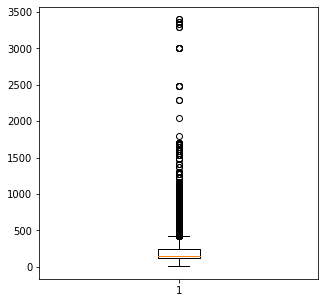

In [24]:
#boxplot of the length of tweet text
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(database.pre_clean_len)
plt.show()

There is a high dispersion in length of tweets. While the median is bellow 250, there are posts much lengthier.

In [25]:
database.tweet_text[database.pre_clean_len > 1000]

196645     We released an update for SUPER PINBALL MAKER!...
196646     We released an update for SUPER PINBALL MAKER!...
196647     We released an update for SUPER PINBALL MAKER!...
196648     We released an update for SUPER PINBALL MAKER!...
196649     We released an update for SUPER PINBALL MAKER!...
                                 ...                        
9110107    Opened #YouTube, and what did I see? My episod...
9110108    Opened #YouTube, and what did I see? My episod...
9368657    @googleanalytics @googlechrome title for this ...
9725819    Most cited researcher with a #github account a...
9766130    This seems handy!! “15 Git Hacks to Save your ...
Name: tweet_text, Length: 206, dtype: object

In [26]:
len(database["tweet_text"])

10089046

It seems like there are comments that have websites on and others that are advertising products. Also, there seems to be some repeated comments. 

In [27]:
#removing duplicates from dataset
database = database.drop_duplicates(subset ="tweet_text", keep = "first") 
database.reset_index(drop=True,inplace=True)

In [28]:
database.tweet_text[database.pre_clean_len > 1000]

34198      We released an update for SUPER PINBALL MAKER!...
175884     https://www.amazon.com/KINGSLONG-Backpack-Comp...
175916     https://www.amazon.com/KINGSLONG-Backpack-Comp...
176090     https://www.amazon.com/KINGSLONG-Backpack-Comp...
176125     https://www.amazon.com/KINGSLONG-Backpack-Comp...
234990     Horrific, Life threatening experience in an UB...
285392     Getting ready for “Catch Me If You Cannes” 5K ...
299252     Most cited researcher with a #github account a...
337823     This seems handy!! “15 Git Hacks to Save your ...
438172     Follow Awesome authors on #Instagram for a cha...
881795     Here's what I've found $319 here can't vouch f...
985955     *SPECIAL BREAKING NEWS*- QL RADIO Will Be Feat...
1022627    #VacancyCO #RealEstate, #PropertyPro.ng, #Lago...
1022901    #VacancyCCO #Tripz Nigeria, #Lagos: #CUSTOMER ...
1323899    #TARGET #UNKT These data are not final. Work i...
1337969    I just entered to win a $100 #Target Gift card...
1487664    ENTER #Win a 

# Data Preparation 

## Cleaning the data

In [29]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

#removing @mentions
pat1 = r'@[A-Za-z0-9_]+'
#removing urls
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    #Decoding HTML to general text 
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        #BOM will be replaced with unicode unrecognisable special characters, then I can process this as “?”
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_pat, '', bom_removed)
    
    stripped = re.sub(www_pat, '', stripped)
    
    lower_case = stripped.lower()
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    #removing hasthags, numbers
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



test_result = []
for t in database["tweet_text"]:
    test_result.append(tweet_cleaner_updated(t))


In [30]:
database = database.reset_index()

print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0, len (database['tweet_text'])):
    #if( (i+1)%10000 == 0 ):
        #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                  
    clean_tweet_texts.append(tweet_cleaner_updated(database['tweet_text'][i]))

Cleaning and parsing the tweets...



In [31]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df

,text
0,truist gloves anyone find out what all the buz...
1,we can change the world with our own two hands...
2,did you know that our truist gloves contain al...
3,relax at home with your best friends and our t...
4,catch up on your weekend reading with our spa ...
...,...
3288469,take this time to clean your saved googlepay n...
3288470,wave of foreclosures on the rise trust no bank...
3288471,chase the bad bank
3288472,chase bank where you at stimuluspackage overdr...


## Exporting CSV file

In [32]:
#adding clean column to initial dataset
database["clean_text"] = clean_df["text"]
database['hasthag'] = database['hasthag'].str.lower()
database = database.drop_duplicates(subset ="clean_text", keep = "first") 
database['clean_length'] = [len(t) for t in database.clean_text]


In [33]:
#removing rows with very short length
database = database[database['clean_length'] > 10]

In [65]:
len(database["hasthag"].unique())

116

In [66]:
database["company_name"].unique()

array(['Truist Financial Corp.', 'The PNC Financial Services Group',
       'Wells Fargo & Company', 'Twitter', 'HP Inc.',
       'Dell Technologies Inc.', 'Uber Technologies', 'Amazon.com',
       'Microsoft Corporation', 'Apple Inc.', 'Facebook', "Macy's",
       'Nordstrom', "Kohl's Corporation", 'CVS Health Corporation',
       'The Procter & Gamble Company', 'Colgate-Palmolive Company',
       'Walgreens Boots Alliance', 'The Coca-Cola Company',
       'Levi Strauss & Co.', 'Costco Wholesale Corporation',
       'The TJX Companies', 'Walmart Inc.', 'Target Corporation',
       "Lowe's Companies", 'Ross Stores', 'Dollar General Corporation',
       'Best Buy Co.', 'Alphabet Inc', 'AmericanAirlines',
       'UnitedAirlines', 'AlaskaAir', 'SpiritAir', 'eBay Inc.', 'Lyft',
       'Snap Inc.', 'JPMorgan Chase & Co.', 'Bank of America',
       'U.S. Bancorp', 'Tyson Foods', 'The Hershey Company',
       'The Kellogg Company', 'The Kroger Company',
       'The J. M. Smucker Company', 'Mo

In [35]:
database.to_csv('./clean_tweet.csv',encoding='utf-8')

# Raw Data Statistics

In [36]:
#first draft of the data dictionary for the dataset
from pprint import pprint
data_dict = {

    'text':{
        'type':database.clean_text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':database.clean_text.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':database.shape
}
pprint(data_dict)

{'dataset_shape': (3116778, 24),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('O')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


In [37]:
len(database["hasthag"].unique())

116

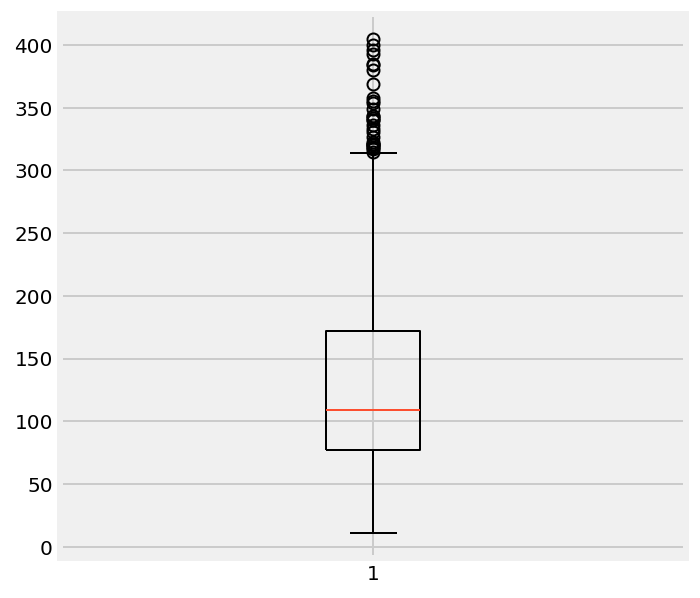

In [38]:
#boxplot of the length of tweet text
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(database.clean_length)
plt.show()

In [41]:
#statistics of the length
database.describe()

,index,retweets,favorites,company_id,Unnamed: 2,Unnamed: 3,creation_year,public_year,industry_id,pre_clean_len,clean_length
count,3.116778e+06,3.116778e+06,3.116778e+06,3.116778e+06,0.0,0.0,1.757307e+06,1.757307e+06,3.116778e+06,3.116778e+06,3.116778e+06
mean,1.642996e+06,8.304272e+00,2.179648e+01,1.843983e+01,NaN,NaN,1.962256e+03,1.941792e+03,2.732287e+00,1.710096e+02,1.252176e+02
std,9.472295e+05,2.166917e+02,6.865526e+02,2.632558e+01,NaN,NaN,5.242127e+01,3.006105e+02,3.293778e+00,7.723052e+01,6.168534e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,1.799000e+03,9.000000e+00,1.000000e+00,1.100000e+01,1.100000e+01
25%,8.247142e+05,0.000000e+00,0.000000e+00,3.000000e+00,NaN,NaN,1.975000e+03,1.980000e+03,1.000000e+00,1.130000e+02,7.700000e+01
50%,1.642052e+06,1.000000e+00,2.000000e+00,5.000000e+00,NaN,NaN,1.976000e+03,1.984000e+03,1.000000e+00,1.540000e+02,1.090000e+02
75%,2.461237e+06,4.000000e+00,9.000000e+00,1.800000e+01,NaN,NaN,1.995000e+03,2.004000e+03,2.000000e+00,2.370000e+02,1.720000e+02
max,3.288472e+06,1.392800e+05,4.621190e+05,1.210000e+02,NaN,NaN,2.011000e+03,2.018000e+03,1.500000e+01,3.399000e+03,4.050000e+02


In [43]:
database.columns

Index(['index', 'hasthag', 'tweet_text', 'date', 'hashtags', 'retweets',
       'favorites', 'mentions', 'company_id', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'company_name_x', 'location', 'district', 'creation_year',
       'public_year', 'ticketname', 'stockindex', 'industry_id',
       'industry_name', 'pre_clean_len', 'clean_text', 'clean_length'],
      dtype='object')

#### Raw Database statistics

In [59]:
database = database.rename(columns = {"company_name_x":"company_name"})

In [60]:
database.columns

Index(['index', 'hasthag', 'tweet_text', 'date', 'hashtags', 'retweets',
       'favorites', 'mentions', 'company_id', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'company_name', 'location', 'district', 'creation_year',
       'public_year', 'ticketname', 'stockindex', 'industry_id',
       'industry_name', 'pre_clean_len', 'clean_text', 'clean_length'],
      dtype='object')

In [74]:
company = database.groupby(['company_name']).agg(['mean', 'count', "max", "min"])["index"]


In [2]:
database["hasthags"].unique()

NameError: name 'database' is not defined

In [73]:
len(database)

3116778

In [45]:
#statistics per sector
database[["clean_length", "industry_name", "retweets", "favorites"]].groupby(['industry_name']).agg(['mean', 'count', "max", "min"])


clean_length                     retweets                   \
                           mean    count  max min       mean    count     max   
industry_name                                                                   
Airlines             135.157448    93472  321  13   3.102865    93472   12980   
Clothing & Apparel    98.983131     1482  275  18   0.209177     1482      11   
Consumer Banking     123.150702   120695  303  11   1.729235   120695    9710   
Food & Beverages     120.156564    84119  303  11  27.231921    84119   51799   
Pharmacy & Drugs     116.547833   117576  302  11   3.804424   117576   80700   
Phone Carriers       117.812238   181150  311  11  12.807646   181150   25921   
Restaurants          135.216561      471  275  12   0.522293      471      36   
Retail               116.951778   360062  405  11   6.145308   360062   44562   
Technology           127.589145  2157751  343  11   8.394132  2157751  139280   

                        favorites                       
                   min       mean    count     max min  
industry_name                                           
Airlines             0   6.296912    93472   17098   0  
Clothing & Apparel   0   0.367746     1482      80   0  
Consumer Banking     0   3.490957   120695   17428   0  
Food & Beverages     0  81.471534    84119  144825   0  
Pharmacy & Drugs     0   8.503674   117576   34120   0  
Phone Carriers       0  41.137858   181150  147982   0  
Restaurants          0   1.339703      471      94   0  
Retail               0  25.300354   360062  224660   0  
Technology           0  19.700476  2157751  462119   0

In [62]:
database[["company_name", "industry_name"]].groupby(['industry_name']).agg(['count', "min", "max"])

company_name                                 \
                          count                            min   
industry_name                                                    
Airlines                  93472                      AlaskaAir   
Clothing & Apparel         1482             Levi Strauss & Co.   
Consumer Banking         120695                Bank of America   
Food & Beverages          84119  Molson Coors Beverage Company   
Pharmacy & Drugs         117576         CVS Health Corporation   
Phone Carriers           181150                      AT&T Inc.   
Restaurants                 471             Darden Restaurants   
Retail                   360062                   Best Buy Co.   
Technology              2157751                   Alphabet Inc   

                                                 
                                            max  
industry_name                                    
Airlines                         UnitedAirlines  
Clothing & Apparel           Levi Strauss & Co.  
Consumer Banking          Wells Fargo & Company  
Food & Beverages                    Tyson Foods  
Pharmacy & Drugs       Walgreens Boots Alliance  
Phone Carriers      Verizon Communications Inc.  
Restaurants                 The Wendy's Company  
Retail                             Walmart Inc.  
Technology                            eBay Inc.

In [63]:
data = database[["company_name", "industry_name"]].groupby(['company_name']).agg(['count'])

In [64]:
data.describe()

,industry_name
,count
count,54.000000
mean,57718.111111
std,94467.588477
min,125.000000
25%,4211.500000
50%,29029.000000
75%,55248.750000
max,465201.000000
